In [2]:
# Remember: comments in python are denoted by the pou_oldd sign
import numpy   as np                    #here we load numpy
from matplotlib import pyplot      #here we load matplotlib
import time, sys                   #and load some utilities

import math

In [3]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

%matplotlib inline

nx = 51
ny = 51
ni = 101

dx = 2 / (nx - 1)
dy = 1 / (ny - 1)

p = np.empty((ny, nx))
p0 = np.empty((ny, nx))

b = np.empty((ny, nx))

# initial condition
for i in range(ny):
    for j in range(nx):
        p[i, j] = 0
        b[i, j] = 0

b[int(ny / 4), int(nx / 4)] = 100
b[int(3 * ny / 4), int(3 * nx / 4)] = -100

# grid
x = np.empty(nx)
y = np.empty(ny)

for i in range(nx):
    x[i] = i * dx

for j in range(ny):
    y[j] = j * dy

p[:, 0] = 0 # p = 0 at x = 0
p[:, -1] = 0 # p = y at x = 2
p[0,:] = 0 # dp / dy = 0 at y = 0 
p[-1,:] = 0 # dp / dy = 0 at y = 1

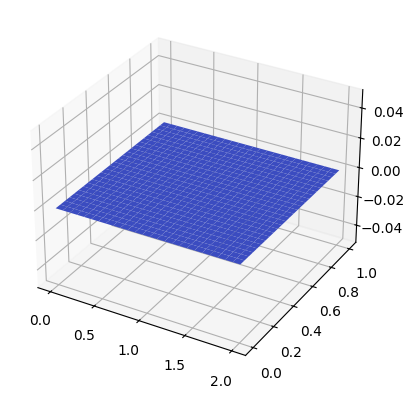

In [4]:
###Plot Initial Condition
##the figsize parameter can be used to produce different sized images
fig, ax = pyplot.subplots(subplot_kw={"projection": "3d"})

X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, p, cmap=cm.coolwarm)

In [5]:
# itertive solution
for n in range(ni):
    p0 = p.copy()
    for i in range(1, ny-1):
        for j in range(1, nx-1):
            p[i, j] = ((dy ** 2) * (p0[i+1, j] + p0[i-1, j]) + (dx ** 2) * (p0[i, j+1] + p0[i, j-1]) - (b[i, j] * dx** 2 * dy ** 2)) / (2 * (dx ** 2 + dy ** 2))
    p[:, 0] = 0 # p = 0 at x = 0
    p[:, -1] = 0 # p = y at x = 2
    p[0,:] = 0 # dp / dy = 0 at y = 0 
    p[-1,:] = 0 # dp / dy = 0 at y = 1

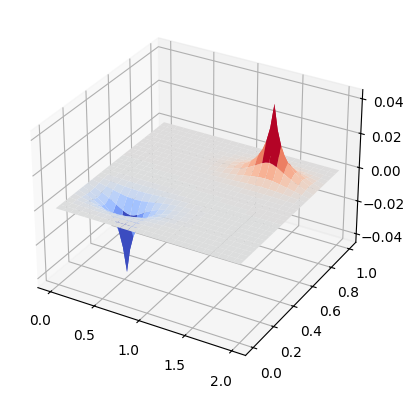

In [6]:
fig, ax = pyplot.subplots(subplot_kw={"projection": "3d"})

X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, p, cmap=cm.coolwarm)